<a href="https://colab.research.google.com/github/navyadeshmukh/vision-modelx/blob/main/CNNs/cnnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Convolutional Neural Network for Handwritten Digit Recognition

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

batch_size = 32

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

100%|██████████| 9.91M/9.91M [00:00<00:00, 35.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.54MB/s]


In [ ]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 32, 5)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 2 * 2, 128)
        self.dropout = nn.Dropout(0.2)
        self.dropout2d = nn.Dropout2d(0.3)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        self.relu = nn.LeakyReLU(0.1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.dropout2d(x)
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
network = Network()

optimizer = torch.optim.SGD(network.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()



In [ ]:
t_loss = []
t_accuracy = []
for epoch in range(40):


    network.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader):

        inputs, labels = data

        outputs = network(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    avg_loss = running_loss / len(trainloader)
    acc = 100. * correct / total

    print(f'[{epoch + 1}], loss: {avg_loss :.3f}, accuracy: {acc :.2f}%')

    t_loss.append(avg_loss)
    t_accuracy.append(acc)




print('Finished Training')

[1], loss: 0.336, accuracy: 88.94%
[2], loss: 0.067, accuracy: 98.08%
[3], loss: 0.046, accuracy: 98.60%
[4], loss: 0.039, accuracy: 98.88%
[5], loss: 0.029, accuracy: 99.18%
[6], loss: 0.028, accuracy: 99.15%
[7], loss: 0.022, accuracy: 99.34%
[8], loss: 0.020, accuracy: 99.37%
[9], loss: 0.018, accuracy: 99.43%
[10], loss: 0.018, accuracy: 99.47%
[11], loss: 0.016, accuracy: 99.49%
[12], loss: 0.014, accuracy: 99.55%
[13], loss: 0.013, accuracy: 99.59%
[14], loss: 0.011, accuracy: 99.67%
[15], loss: 0.010, accuracy: 99.69%
[16], loss: 0.011, accuracy: 99.63%
[17], loss: 0.009, accuracy: 99.71%
[18], loss: 0.010, accuracy: 99.69%
[19], loss: 0.009, accuracy: 99.67%
[20], loss: 0.009, accuracy: 99.72%
[21], loss: 0.007, accuracy: 99.78%
[22], loss: 0.007, accuracy: 99.78%
[23], loss: 0.007, accuracy: 99.76%
[24], loss: 0.008, accuracy: 99.72%
[25], loss: 0.008, accuracy: 99.73%
[26], loss: 0.007, accuracy: 99.76%
[27], loss: 0.006, accuracy: 99.78%
[28], loss: 0.006, accuracy: 99.80%
[

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data

        outputs = network(images)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Test Accuracy: {100 * correct // total} %')

Final Test Accuracy: 99 %


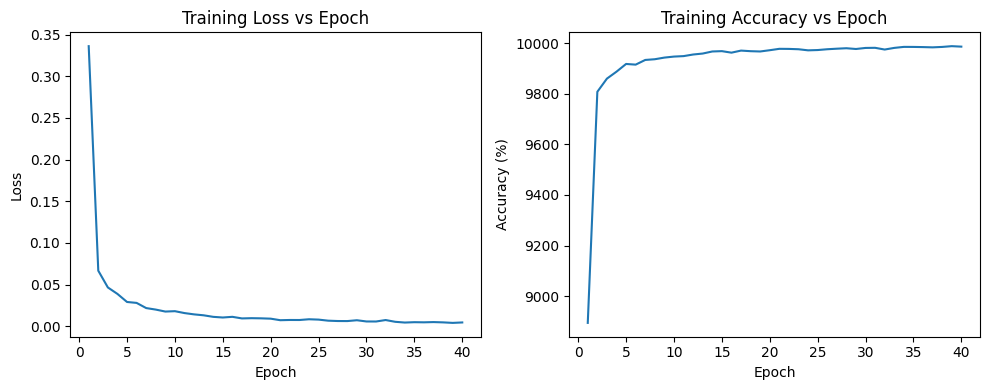

In [ ]:
epochs = range(1, len(t_loss) + 1)

# Plot Loss vs. Epoch
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, t_loss)
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')


# Plot Accuracy vs. Epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, [a * 100 for a in t_accuracy])
plt.title('Training Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')


plt.tight_layout()
plt.show()


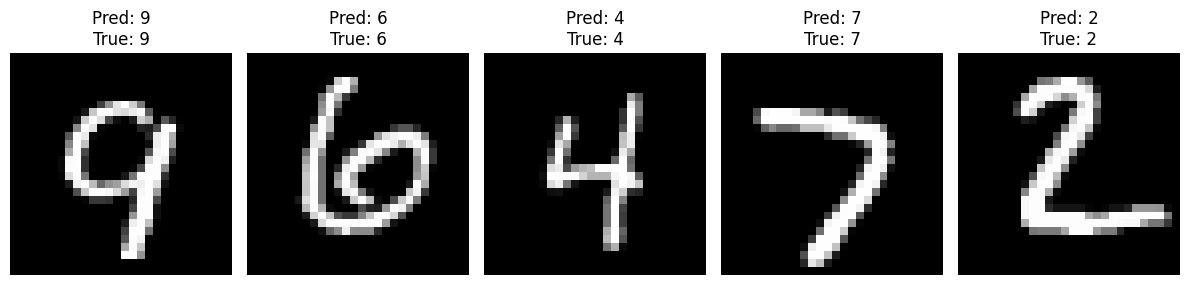

In [ ]:
network.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = network(images)
        _, predicted = torch.max(outputs, 1)
        break

X_test = images.cpu().numpy()
y_test = labels.cpu().numpy()
predictions = predicted.cpu().numpy()

random_index = np.random.permutation(len(y_test))
X_test = X_test[random_index]
y_test = y_test[random_index]
predictions = predictions[random_index]

plt.figure(figsize=(12, 4))
for i in range(5):
    image = X_test[i].squeeze()  # shape: (28, 28)
    true_label = y_test[i]
    predicted_label = predictions[i]

    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
